# Pandas in a Nutshell

> Simon Stride

*Data Southwest May 2021*

````shell
# run from terminal
jupyter nbconvert Jupyter\ Pandas_in_a_Nutshell.ipynb --to slides --post serve
````

## About Me

Currently work on a farm in Devon

ETL'ing data around in SQL Server and Data Warehouses for the last 10 years

Talk to me about Data Warehouses, Python, TSQL, Data Science, Data Engineering, BI

# What is Pandas?

* Python library for data manipulation in memory
* Ubiquitous for Data Science & Analysis in Python
* Built on NumPy => operations run in *C*
* Includes a fast and efficient **DataFrame** object for tabular data

[https://pandas.pydata.org/](https://pandas.pydata.org/)

Install from pip (already installed in Conda)

````shell
pip install pandas
````

[https://pypi.org/project/pandas/](https://pypi.org/project/pandas/)

In [1]:
import pandas as pd

df = pd.DataFrame({"column0": [0, 1, 2, 3],
                   "column1": [10.1, 20.2, 30.3, 40.4],
                   "column2": ["a", "b", "c", "d"]})

df

,column0,column1,column2
0,0,10.1,a
1,1,20.2,b
2,2,30.3,c
3,3,40.4,d


So what?

In [2]:
import csv

data = {}

with open("iris.csv") as f:
    reader = csv.reader(f)
    headers = next(reader)
    for h in headers:
        data[h] = []
    for r in reader:
        for i, h in enumerate(headers):
            data[h].append(r[i])

print(data.keys())

dict_keys(['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety'])


## Write Less Code!

The following examples both read a local csv file into memory and read the column headers
    
````python
import csv
# Load data into a dict object
data = {}

with open("iris.csv") as f:
    reader = csv.reader(f)
    headers = next(reader)
    for h in headers:
        data[h] = []
    for r in reader:
        for i, h in enumerate(headers):
            data[h].append(r[i])
````

...and the equivalent in Pandas dataframes:

````python
import pandas as pd

df = pd.read_csv("iris.csv")
````


In [3]:
import pandas as pd

df = pd.read_csv("iris.csv")

In [4]:
# View a subset of data

df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


# Get Data from pretty much anywhere...

Method | Description
---|---
read_table | Read general delimited file into DataFrame.
**read_csv** | Read a comma-separated values (csv) file into DataFrame.
read_fwf| Read a table of fixed-width formatted lines into DataFrame.
read_clipboard | Read text from clipboard and pass to read_csv.
**read_excel** | Read an Excel file into a pandas DataFrame.
**read_json** | Convert a JSON string to pandas object.
read_html | Read HTML tables into a list of DataFrame objects.
read_hdf | Read from the store, close it if we opened it.
read_feather | Load a feather-format object from the file path.
**read_parquet** | Load a parquet object from the file path, returning a DataFrame.
read_orc | Load an ORC object from the file path, returning a DataFrame.
read_sas | Read SAS files stored as either XPORT or SAS7BDAT format files.
read_spss | Load an SPSS file from the file path, returning a DataFrame.
**read_sql_table** | Read SQL database table into a DataFrame.
**read_sql** | Read SQL query or database table into a DataFrame.
read_gbq | Load data from Google BigQuery.
read_stata | Read Stata file into DataFrame.
read_xml | Read XML file string *(New in version 1.3.0.)*


From the Api Docs [https://pandas.pydata.org/docs/reference/index.html#api](https://pandas.pydata.org/docs/reference/index.html) *(emphasis mine)*

# ...To Pretty Much Anywhere

[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

<table>
    <tr>
        <td>
    <div align="left">
            <ul>
            <li>to_clipboard</li>
            <li><b>to_csv</b></li>
            <li><b>to_dict</b></li>
            <li>to_excel</li>
            <li>to_feather</li>
            <li>to_gbq</li>
            <li>to_hdf</li>
            <li>to_html</li>
            <li><b>to_json</b></li>
            <li>to_latex</li>
            <li>to_markdown</li>
    </ul>
            </div>
        </td>
        <td>
    <div align="left">
            <ul>
            <li><b>to_numpy</b></li>
            <li><b>to_parquet</b></li>
            <li>to_period</li>
            <li>to_pickle</li>
            <li>to_records</li>
            <li><b>to_sql</b></li>
            <li>to_stata</li>
            <li>to_string</li>
            <li>to_timestamp</li>
            <li>to_xarray</li>
            </ul>
            </div>
        </td>
    </tr>
</table>










In [5]:
!pip install pyodbc sqlalchemy

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


Simple ETL Example - read from SQL, make a column, save the result

In [6]:
# 
import pyodbc
from sqlalchemy import create_engine

sql_driver = sorted([x for x in pyodbc.drivers() if "SQL Server" in x])[-1]
server_name = r".\SQL2017"
database_name = "AdventureWorksDW2017"

mssql_engine = create_engine("mssql+pyodbc://{}/{}?driver={}".format(server_name, database_name, sql_driver))

# "EXTRACT"
query = "select * from dbo.DimCustomer"
df = pd.read_sql(con=mssql_engine, sql=query)

# "TRANSFORM" - reassign as a subset of columns
df = df[["FirstName", "LastName"]]
df["FullName"] = df.apply(lambda x: " ".join(x.fillna("")), axis=1)

# "LOAD" - Data Persistence
df.to_sql(con=mssql_engine, name="sql_southwest", if_exists="replace")
df.to_csv("sql_southwest.csv")
df.to_parquet("sql_southwest.parquet")


In [7]:
df.head()

,FirstName,LastName,FullName
0,Jon,Yang,Jon Yang
1,Eugene,Huang,Eugene Huang
2,Ruben,Torres,Ruben Torres
3,Christy,Zhu,Christy Zhu
4,Elizabeth,Johnson,Elizabeth Johnson


## Common SQL Operations

* **Joining Datasets** - use `df2.join(df2)` or `df1.merge(df2)` for sql-like joins
* **Group By** - group by values and add numeric aggregates
* **Filtering** - use `df.query` or `df[df[col]=='val']`
* **Union** - use `pd.Concat([df1, df2...])`
* **Ordering** - use `df.sort_values([col1, col2...])`

## Data Manipulation

* `fillna` - replace missing data using static values (e.g. mean or 0)
* `bfill` and `ffill` - back/forward fill strategies (wrapper around fillna) - optionally use Group By
* `interpolate` missing values using linear, polynomial interpolation  (uses SciPy)
* `replace` - dataframe wide string functions
* `apply` apply row-wise lambda functions

# Data Exploration


* `df.info()` - information about the dataframe - what columns and datatypes
* `df.describe()` - stats about the data in all numeric (by default) columns
* `df.mean()` - directly run builtin or NumPy or custom aggregates


In [8]:
iris_df = pd.read_csv("iris.csv")

print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [9]:
print(iris_df.describe(include="all"))

        sepal.length  sepal.width  petal.length  petal.width     variety
count     150.000000   150.000000    150.000000   150.000000         150
unique           NaN          NaN           NaN          NaN           3
top              NaN          NaN           NaN          NaN  Versicolor
freq             NaN          NaN           NaN          NaN          50
mean        5.843333     3.057333      3.758000     1.199333         NaN
std         0.828066     0.435866      1.765298     0.762238         NaN
min         4.300000     2.000000      1.000000     0.100000         NaN
25%         5.100000     2.800000      1.600000     0.300000         NaN
50%         5.800000     3.000000      4.350000     1.300000         NaN
75%         6.400000     3.300000      5.100000     1.800000         NaN
max         7.900000     4.400000      6.900000     2.500000         NaN


In [10]:
print(iris_df.mean(axis=0))

sepal.length    5.843333
sepal.width     3.057333
petal.length    3.758000
petal.width     1.199333
dtype: float64


# Built in Plots

For convenience, you *can* call matplotlib charts directly from the dataframe

<AxesSubplot:xlabel='sepal.length', ylabel='sepal.width'>

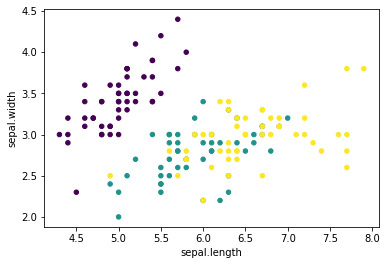

In [11]:
# Get the file
iris_df = pd.read_csv("iris.csv")

# Encode the variety column as 0, 1, 2
iris_df["variety_codes"] = pd.Categorical(iris_df["variety"]).codes

# Scatterplot
iris_df.plot(x="sepal.length", y="sepal.width", c="variety_codes", colormap="viridis", kind="scatter", colorbar=False)


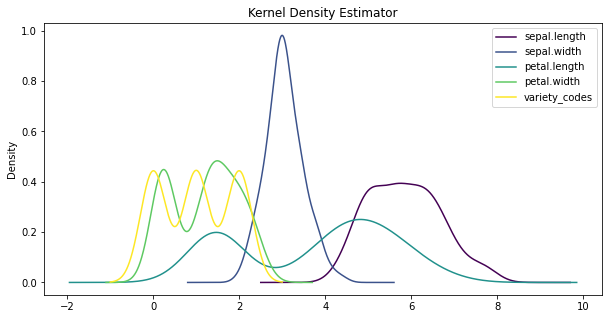

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))

# Kernel Density Estimator
iris_df.plot(colormap="viridis", kind="kde", ax=ax, title="Kernel Density Estimator")

plt.show()

# Plays nicely with others

* Built on NumPy so switching back to NumPy arrays is trivial (use `df.values`)
* Generally works well with `sklearn` estimators for Machine Learning
* Other charting libraries like **Seaborn** integrate smoothly with DataFrames
* Extensibility - pandasgui, pandas-profiler, geopandas, bcpandas

# Not Enough Memory?

Pandas loads data into memory, meaning the dataset size is constrained by your machine.

The `chunksize` parameter allows methods like `read_sql` to return an iterable, allowing you to process a subset of your source data one DataFrame at a time

````python
dfs = pd.read_sql(con=con, sql=query, chunksize=10000)
for df in dfs:
    df.do_stuff(...)
````

# Clustering Up

For larger operations, scale dataframes horizontally over multiple machines:

### Dask

Distributed DataFrames - *similar* API to Pandas over a cluster, inc. resource manager, lazy execution model

[https://dask.org/](https://dask.org/)

### Koalas

Pandas API over Spark Cluster.

> Have a single codebase that works both with pandas (tests, smaller datasets) and with Spark (distributed datasets).

[https://koalas.readthedocs.io/en/latest/](https://koalas.readthedocs.io/en/latest/)

# What Next?

Official docs

> [https://pandas.pydata.org]([https://pandas.pydata.org)

Coming from a SQL Background?

> [https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html#compare-with-sql](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html#compare-with-sql)


````python
pip install pandas
````